In [1]:
import osmnx as ox
import networkx as nx
import time
from shapely.geometry import Polygon
from shapely.geometry import shape
import pandas as pd
import os
import fiona
import numpy as np

In [2]:
def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = np.arange(0, gdf_edges.shape[0], dtype='int')
    # save the nodes and edges as separate ESRI shapefiles
    # fiona 오류 나는거 잡기위해 추가 with~
    with fiona.Env(OSR_WKT_FORMAT="WKT2_2018"):
        gdf_nodes.to_file(filepath_nodes, encoding=encoding)
        gdf_edges.to_file(filepath_edges, encoding=encoding)

In [3]:
# San Francisco
bounds = (-122.4365, -122.3859, 37.8140, 37.7673)
x1,x2,y1,y2 = bounds
boundary_polygon = Polygon([(x1,y1),(x2,y1),(x2,y2),(x1,y2)])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
start_time = time.time()
#save_graph_shapefile_directional(G, filepath='./small-Sanf')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [5]:
place = "Jongro, Seoul, Korea"
G = ox.graph_from_place(place, network_type='drive')
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

ValueError: Found no graph nodes within the requested polygon

In [6]:
# Beijing
bounds = (116.2985, 116.4619, 39.9690, 39.8439)
x1,x2,y1,y2 = bounds
boundary_polygon = Polygon([(x1,y1),(x2,y1),(x2,y2),(x1,y2)])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
start_time = time.time()
save_graph_shapefile_directional(G, filepath='./network-Beijing')
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\skang\Anaconda3\envs\trejectory\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


--- 7.558807373046875 seconds ---


In [9]:
# Porto
41.1409,-8.5991
41.1403,-8.6328
41.1659,-8.6337
41.1627,-8.5984
bounds = (-8.6337, -8.5984, 41.1659, 41.1403)
x1,x2,y1,y2 = bounds
boundary_polygon = Polygon([(x1,y1),(x2,y1),(x2,y2),(x1,y2)])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
start_time = time.time()
save_graph_shapefile_directional(G, filepath='./network-Porto')
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\skang\Anaconda3\envs\trejectory\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


--- 0.7139122486114502 seconds ---


In [10]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
print(G)

MultiDiGraph with 908 nodes and 1675 edges


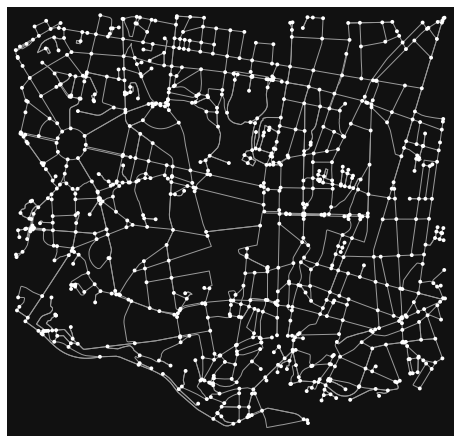

In [11]:
fig, ax = ox.plot_graph(G)

In [58]:
gdf_nodes.to_csv('C:/users/skang/trajectory/network-Porto/Porto_nodes.csv')
gdf_edges.to_csv('C:/users/skang/trajectory/network-Porto/Porto_edges.csv')